# Plot Cp distribution
## grid0 case, oldBC
Generate the `cylpressure.dat` file using

```bash
$ python3 ../utilities/pp_cyl.py -m rundir/out01/cylinder.e -t 30
```

In [1]:
%%capture
import sys
sys.path.insert(1, '../utilities')
import litCpData
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Basic problem parameters
D     = 6            # Cylinder diameter
U     = 20           # Freestream velocity
Lspan = 24           # Spanwise length
A     = D*Lspan      # frontal area
rho   = 1.225        # density
Q     = 0.5*rho*U*U  # Dynamic head

In [3]:
# Load the pressure data
P = np.loadtxt('cylpressure.dat', skiprows=1, delimiter=',')

# Construct Theta vs Cp
XYtoDeg = lambda x, y: np.arctan2(y,x)*180.0/np.pi+180.0
X=np.array([XYtoDeg(P[:,0], P[:,1]), P[:,3]/Q]).transpose()
thetaCp=X[X[:,0].argsort()]

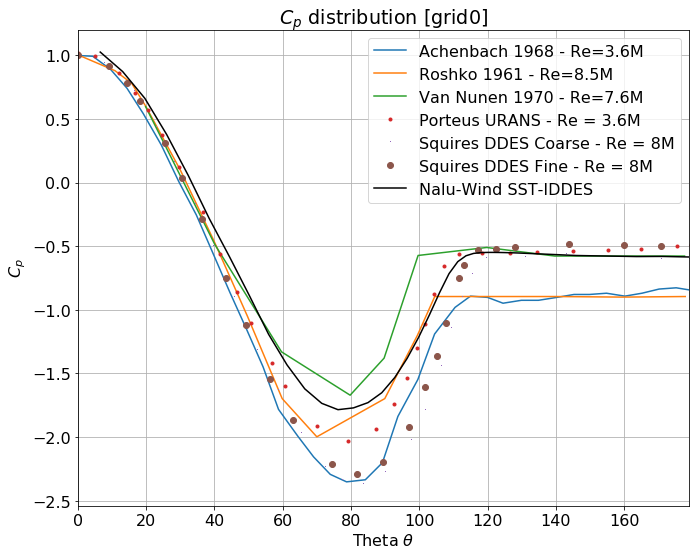

In [4]:
# Plot Cp distribution
plt.rc('font', size=16)
plt.figure(figsize=(10,8))

# Plot other people's values
litCpData.plotEXP()
litCpData.plotCFD()

plt.plot(thetaCp[:,0], thetaCp[:,1],'-', color='k', label='Nalu-Wind SST-IDDES')
plt.xlim([0, 179])
plt.legend()
plt.xlabel(r'Theta $\theta$')
plt.ylabel(r'$C_p$')
plt.grid()
plt.title(r'$C_p$ distribution [grid0]')
plt.tight_layout()

In [5]:
# Save the data
np.savetxt('CpDistribution.dat', thetaCp)